In [2]:
import math
import sys
import os
sys.path.insert(0,'..')
from doe_xstock.data import CityLearnData
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from src.utilities import DataHandler, FileHandler
import json

In [8]:
settings = FileHandler.get_settings()
data = DataHandler.get_concat_data('lod_3', 'time_series')
data['year'] = data['id'].str.split('-', expand=True)[8].astype(int)
data_list = []

### Check Occupant Count for each building - LOD 3

In [19]:
##I wanted to graph the occupant counts because they should correspond with the 'Home', 'Sleep', and 'Away' schedules,
##in that we are assuming the occupant count is zero from M-F 9AM-5PM. An assumption in the probability models was that
##occupants would only be home approximately 70% of the time, so we do need periods in which they are 'Away' for this to 
##correspond. I believe in Giuseppe's model it was the same assumption, and during 'Away' periods the model was incentivized
##to make energy savings decisions.

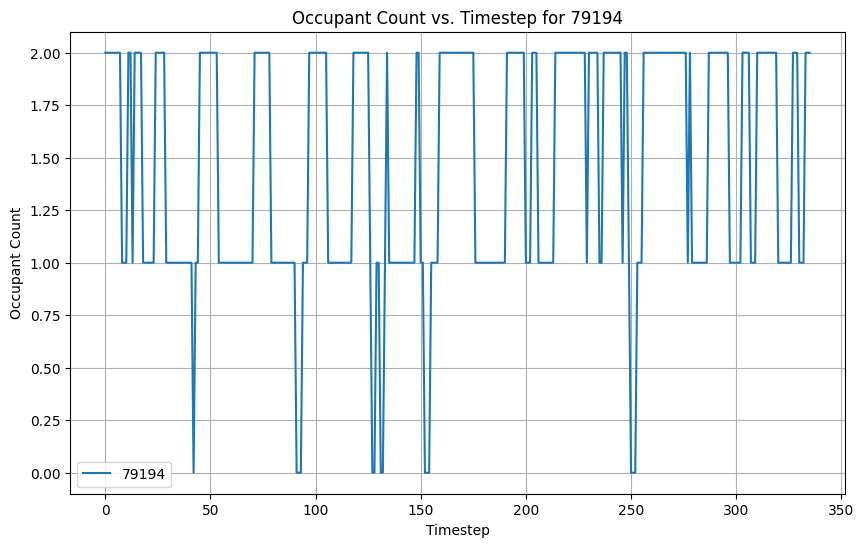

In [20]:
##Just plotting occupancy data for a two weeks (336 hours) for Bldg 79194 
# -- noticing that there are very few periods where occupancy = 0

subset_data = data.head(336)

# Group the data by 'bldg_name'
grouped_data = subset_data.groupby('bldg_name')

# Create a separate plot for each unique 'bldg_name'
for bldg_name, group in grouped_data:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(group['time_step'], group['occupant_count'], label=bldg_name)
    plt.xlabel('Timestep')
    plt.ylabel('Occupant Count')
    plt.title(f'Occupant Count vs. Timestep for {bldg_name}')
    plt.legend()
    plt.grid(True)

    # Show each individual plot
    plt.show()

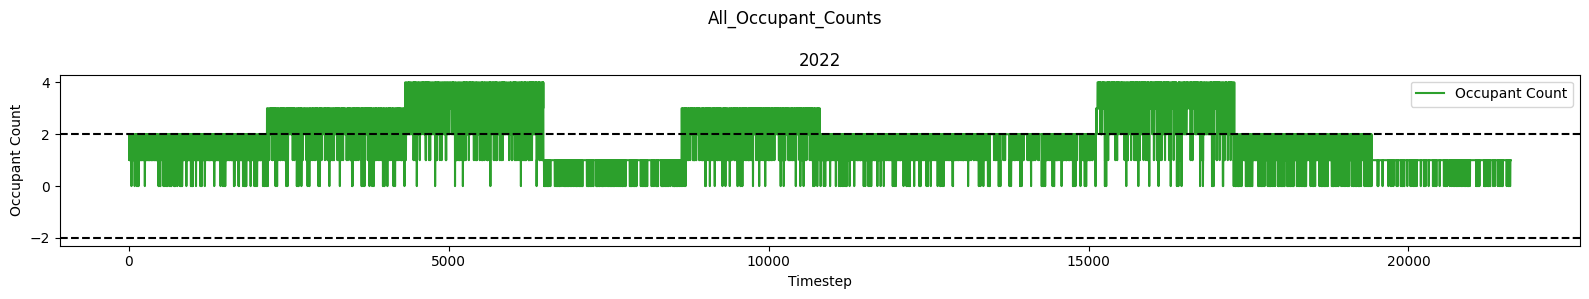

In [21]:
##Figure shows occupancy counts for all 10 buildings 
#(timestep 0 ~ 2000 is Building 1, 200~4800 is Building 2, ~4800-6500 timesteps is Building 3, etc.)
#From the figure, we can see that occupancy is probably random for all buildings?
#In Giuseppe's methodology, the main way they were able to capture reductions in peak energy demand etc. was through
#capitalizing on the 'Away' period - we should consider doing the same.
#The occupant-thermostat interaction models vary depending on 'Home', 'Sleep', and 'Away' hours, so we should consider
#adjusting the occupancy to align with these timeframes (e.g. occupant is 'Away' from 9-5 PM, M-F)

fig, ax = plt.subplots(1, len(years), figsize=(16, 3.0))

y1 = data['occupant_count'].tolist()
data_list.append(ydata)
ax.plot(y1, color='tab:green', label='Occupant Count')
ax.axhline(2.0, color='black', linestyle='--')
ax.axhline(-2.0, color='black', linestyle='--')
ax.set_xlabel('Timestep')
ax.set_ylabel('Occupant Count')
ax.set_title(f'{year}')
ax.legend()

fig.suptitle('All_Occupant_Counts')
plt.tight_layout()
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 30 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   bldg_name                                                            21600 non-null  object 
 1   net_electricity_consumption                                          21600 non-null  float64
 2   net_electricity_consumption_without_storage                          21600 non-null  float64
 3   net_electricity_consumption_without_storage_and_partial_load         21600 non-null  float64
 4   net_electricity_consumption_without_storage_and_partial_load_and_pv  21600 non-null  float64
 5   indoor_dry_bulb_temperature                                          21600 non-null  float64
 6   indoor_dry_bulb_temperature_without_partial_load                     21600 non-null  float64
 7   indo

In [29]:
##Question: What is indoor_bulb_temperature_without_partial_load?

In [26]:
##Question: Are occupant-thermostat interaction models being triggered ever? 
equal_rows_count = (data['indoor_dry_bulb_temperature_set_point'] == data['indoor_dry_bulb_temperature_set_point_without_control']).sum()

print("Number of rows where the two columns are equal:", equal_rows_count)

Number of rows where the two columns are equal: 21600


In [27]:
##Answer: It appears not, as the setpoint with/without control is always the same?

In [28]:
##To discuss: How we handle interactions. E.g. occupant changes the thermostat setpoint, duration of 'override' = 4 hours?
##Then thermostat setpoint returns to whatever the schedule says after the 4 hours.

In [31]:
##To do: Try to run simulation for really low SPs as an example (e.g. 15 degrees C)
##to make sure that the interaction models are triggered for each Occupant Type